In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('./data/NetflixOriginals.csv',encoding='"ISO-8859-1"')
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [3]:
df['Premiere'] = pd.to_datetime(df['Premiere'])

# 날짜 정렬

기본 EDA 

1. 기초통계
2. 결측치 확인
3. 컬럼별 종류 개수
4. 장르별 개수 상위
5. 개봉일 범위  xxxxx
6. 연도별 개봉수
7. 월별 개봉수
8. 장르별 런타임
9. 장르별 스코어
10. 언어별 스코어
11. 언어 개수
12. 다중언어 개수  xxxxxxxxx
13. 월별 스코어

In [ ]:
# 1번
df.describe()

In [ ]:
# 2번
df.isnull().sum()

In [ ]:
# 3번
df.nunique()

In [ ]:
# 4번


plt.figure(figsize=(8,5))
df.value_counts(df['Genre'])[:10].plot(
    kind='bar',
    width=0.7,
    color = sns.color_palette('winter'),
    alpha = 0.4
)
plt.title('TOP 10 Genre')
_=plt.xticks(rotation=45)

In [ ]:
# 6번

df.groupby(df['Premiere'].dt.to_period("Y")).size().plot(kind='bar',color = sns.color_palette('winter'),alpha = 0.4)
_=plt.xticks(rotation=45)

# 연도별 개봉 개수

In [ ]:
# 7번

df.groupby(df['Premiere'].dt.month).size().plot(kind='bar',color=sns.color_palette('winter'),alpha=0.7)
_=plt.xticks(rotation=0)
# 월별 개봉 개수

In [ ]:
# 8번

df.groupby(['Genre'])['Runtime'].mean().sort_values(ascending=True)[-15:].plot(kind='barh')

In [ ]:
df['Runtime'].plot(kind='hist',bins=np.arange(0,150,3))

In [ ]:
# 9번
# 장르별 스코어

df.groupby(['Genre'])['IMDB Score'].mean().sort_values().iloc[-10:].plot(kind='barh')

In [ ]:
# 10번
# 언어별 스코어

df.groupby(['Language'])['IMDB Score'].mean().sort_values(ascending=False).iloc[:20].plot(kind='barh')
# 38개 (뒤에 .shape 하면 나옴)

In [ ]:
# 11번
# 언어 개수

df.value_counts(df['Language'])[:20].plot(kind='pie')

In [ ]:
# 12번 xxxxxxxxxxxxxxxxxxxxx
# 다중 언어 개수

MultiLingual_df = df[df['Language'].str.contains('/')]
MultiLingual_df.groupby(['Language'])['IMDB Score'].mean().sort_values(ascending=False)
# 16개

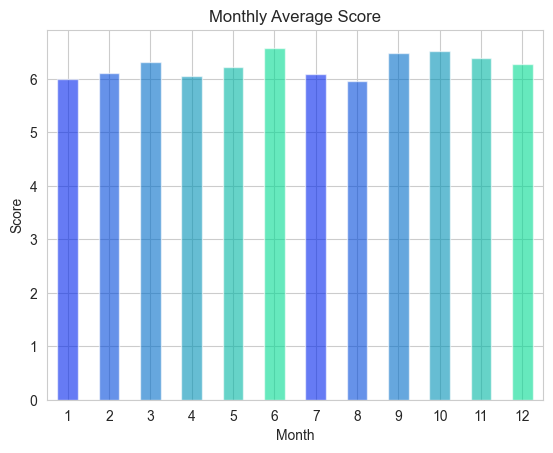

In [5]:
# 13번

monthly_average_score = df.groupby(df['Premiere'].dt.month)['IMDB Score'].mean()

sns.set_style('whitegrid')
monthly_average_score.plot(kind='bar',color = sns.color_palette('winter'),alpha=0.6)
plt.xlabel('Month')
plt.ylabel('Score')
plt.title('Monthly Average Score')
_=plt.xticks(rotation=0)

# 월별 스코어

In [ ]:
sns.set_style('whitegrid')
sns.stripplot(
    data=df,
    x='clarity',
    y='price',
    size=1,
    palette='pastel'
)sns.

In [ ]:
monthly_score.nlargest(12)

In [ ]:
# 연도별 평균 점수

yearly_average_score = df.groupby(df['Premiere'].dt.year)['IMDB Score'].mean()

yearly_average_score.plot(kind='bar',color = sns.color_palette('winter'),alpha=0.6)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Yearly Average Score')
_=plt.xticks(rotation=0)



In [ ]:
yearly_average_score.mean()

기법 사용 , 제언

월별 score 계산 --> 8월 낮음 / 6월 가장 높음--> 분석

귀무가설 : 8월 평균 == 나머지 평균

대립가설 : 8월 평균 != 나머지 평균

one sample t-test 선정

이유
1. 모집단이 정규분포 따르는지 모름
2. 모분산 모름????

In [ ]:
monthly_basis_score

In [ ]:
# 6월 가장 높음

scores = np.array([6.0027027 , 6.11794872, 6.32291667, 6.04920635, 6.21320755,
       6.09117647, 5.951351, 6.48113208, 6.52207792,
       6.39824561, 6.2745098 ])

print(scores.mean(),scores.std(ddof=1))

In [ ]:
june_score = 6.58285714

In [ ]:
# 검정통계량 계산

(5.951351351351351 - 6.277816455695082) / (0.20077736867761145 / 37**0.5)

t 분포표

단측

자유도 30 : 1.697
자유도 40 : 1.684

양측

자유도 30 : 2.042
자유도 40 : 2.021

귀무가설 기각 가능!

In [ ]:
monthly_basis_score.values

In [ ]:
t_statistics,p_value = stats.ttest_1samp(scores,june_score)
t_statistics,p_value

p_value 0.05보다 낮다 ==> 귀무가설 기각, 대립가설 채택 가능

원인 분석

In [ ]:
monthly_basis_score = df.groupby(df['Premiere'].dt.month)['IMDB Score'].mean()
monthly_basis_score.sort_values(ascending=False)

가정

1. 장르가 영향을 미쳤다
    - 8월의 장르 비율은 나머지의 비율과 달라야 한다.
    
        -> 장르 비율 비슷함 :의미 없음
    

2. 런타임이 영향을 미쳤다
    - 8월 런타임은 나머지 런타임과 달라야 한다
    
        -> 8월 런타임 짧다 : 의미 있음?


3. 언어가 영향을 미쳤다
    - 8월 언어는 나머지 언어와 달라야 한다

        -> 언어 차이 없음
4. 그 외

In [ ]:
# 1-1 8월의 장르

august_genre = df[df['Premiere'].dt.month == 8]['Genre'].value_counts()

august_genre_big = august_genre[august_genre > 1]
august_genre_small = august_genre[august_genre <= 1].sum()

august_genre_big

In [ ]:
plt.pie(august_genre)

In [ ]:
# 1-2 나머지의 장르

rest_genre = df[df['Premiere'].dt.month != 8]['Genre'].value_counts()

rest_genre

In [ ]:
plt.pie(rest_genre)

1. 장르 비슷함 -> 무의미

============================

2. 런타임이 영향을 미쳤다

In [ ]:
# 8월 런타임과 나머지 런타임
august_runtime = df[df['Premiere'].dt.month == 8]['Runtime'].mean()
rest_runtime = df[df['Premiere'].dt.month != 8]['Runtime'].mean()

In [ ]:
df.groupby(df['Premiere'].dt.month)['Runtime'].mean()

2. 런타임이 짧다!

=============

3. 언어가 영향을 미쳤다

In [ ]:
august_language = df[df['Premiere'].dt.month == 8]['Language'].value_counts()
august_language

In [ ]:
rest_language = df[df['Premiere'].dt.month != 8]['Language'].value_counts()

In [ ]:
plt.pie(august_language)

In [ ]:
plt.pie(rest_language)

3. 언어 차이 없음

추가 시각화

documenatry 월별 스코어
스코어 스캐터

In [ ]:
df[df['Genre']=='Documentary'].groupby(df['Premiere'].dt.month)['IMDB Score'].mean()

In [ ]:
# 다큐멘터리 월 평균 점수
documentary_monthly_score = df[df['Genre']=='Documentary'].groupby(df['Premiere'].dt.month)['IMDB Score'].mean()

documentary_monthly_score.plot(kind='line')
plt.title('Documentary Monthly Score')

In [ ]:
sns.scatterplot(
    data=df,
    x='Premiere',
    y='IMDB Score'
    ).set(
        title = 'IMDV Score by Premiere'
    )

In [5]:
# 등분산성 검정
test_names = ["IMDB Score"]

june_scores = df[(df['Premiere'].dt.month == 10) & (df['Genre'] == 'Documentary')][['IMDB Score']]
rest_scores = df[(df['Premiere'].dt.month != 10) & (df['Genre'] == 'Documentary')][['IMDB Score']]
for test_name in test_names:
    _, p_value_levene = stats.levene(june_scores[test_name], rest_scores[test_name])
    if p_value_levene > 0.05:
        print(f"{test_name} p-value: {p_value_levene}, 등분산 가정 만족")
    else:
        print(f"{test_name} p-value: {p_value_levene}, 이분산 가정 만족")

IMDB Score p-value: 0.6591983078250134, 등분산 가정 만족


In [7]:
t_statistic, p_value = stats.ttest_ind(
    a=june_scores,
    b=rest_scores,
    alternative="two-sided",
    equal_var=True
)

print(f"p-value: {p_value}")
print(f"귀무 가설 기각: {p_value < 0.05}")

p-value: [0.01185071]
귀무 가설 기각: [ True]


In [8]:
from scipy import stats

test_names = ["IMDB Score"]

documentary_scores = df[df['Genre'] == 'Documentary'][['IMDB Score']]
drama_scores = df[df['Genre'] != 'Documentary'][['IMDB Score']]

for test_name in test_names:
    _, p_value_levene = stats.levene(documentary_scores[test_name], drama_scores[test_name])
    if p_value_levene > 0.05:
        print(f"{test_name} p-value: {p_value_levene}, 등분산 가정 만족")
    else:
        print(f"{test_name} p-value: {p_value_levene}, 이분산 가정 만족")

IMDB Score p-value: 0.009114190007489658, 이분산 가정 만족


In [9]:
t_statistic, p_value = stats.ttest_ind(
    a=documentary_scores,
    b=drama_scores,
    alternative="two-sided",
    equal_var=False
)

print(f"p-value: {p_value}")
print(f"귀무 가설 기각: {p_value < 0.05}")

p-value: [2.56613755e-25]
귀무 가설 기각: [ True]


In [10]:
test_names = ["IMDB Score"]
english_scores = df[df['Language'].str.contains('English')][['IMDB Score']]
other_scores = df[~df['Language'].str.contains('English')][['IMDB Score']]
for test_name in test_names:
    _, p_value_levene = stats.levene(english_scores[test_name], other_scores[test_name])
    if p_value_levene > 0.05:
        print(f"{test_name} p-value: {p_value_levene}, 등분산 가정 만족")
    else:
        print(f"{test_name} p-value: {p_value_levene}, 이분산 가정 만족")

IMDB Score p-value: 0.11077329074514781, 등분산 가정 만족


In [11]:
t_statistic, p_value = stats.ttest_ind(
    a=english_scores,
    b=other_scores,
    alternative="two-sided",
    equal_var=False
)

print(f"p-value: {p_value}")
print(f"귀무 가설 기각: {p_value < 0.05}")

p-value: [2.43741418e-06]
귀무 가설 기각: [ True]
